<a href="https://colab.research.google.com/github/skizzle010/Predictive-Maintenance/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Description** 📃
Dataset source: [UCI](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)


This synthetic dataset is modeled after an existing ***milling machine*** and consists of **10,000 data points** stored as rows with **14 features** in columns:

1. `UID`: unique identifier ranging from 1 to 10000.
2. `product ID`: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.
3. `type`: just the product type L, M or H from column 2.
4. `air temperature` [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
5. `process temperature` [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

6. `rotational speed` [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.
7. `torque` [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8.` tool wear` [min]: (breakdown and gradual failure of a cutting tool due to regular operation) The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. a '`machine failure`' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes:


> **Tool wear failure** (`TWF`): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

> **Heat dissipation failure** (`HDF`): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

> **Power failure** (`PWF`): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

> **Overstrain failure** (`OSF`): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

> **Random failures** (`RNF`): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.



If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.



---

In [5]:
pip install "visions>=0.7.5,<0.8.2" "joblib>=1.2.0" "ydata-profiling" --upgrade


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=46fe2ee564b74656b8ae0fdb1a0bd2a40d51ec79638cc8ef68695eb36181cb57
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# import the required libraries
import pandas as pd
#import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the dataset**

In [3]:
df = pd.read_csv('/content/ai4i2020.csv')

In [ ]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# **Data Preparation**

## **Exploratory data analysis**

In [ ]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [ ]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [ ]:
df.head(2)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0


In [ ]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [ ]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [ ]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Type,10000,3,L,6000


Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


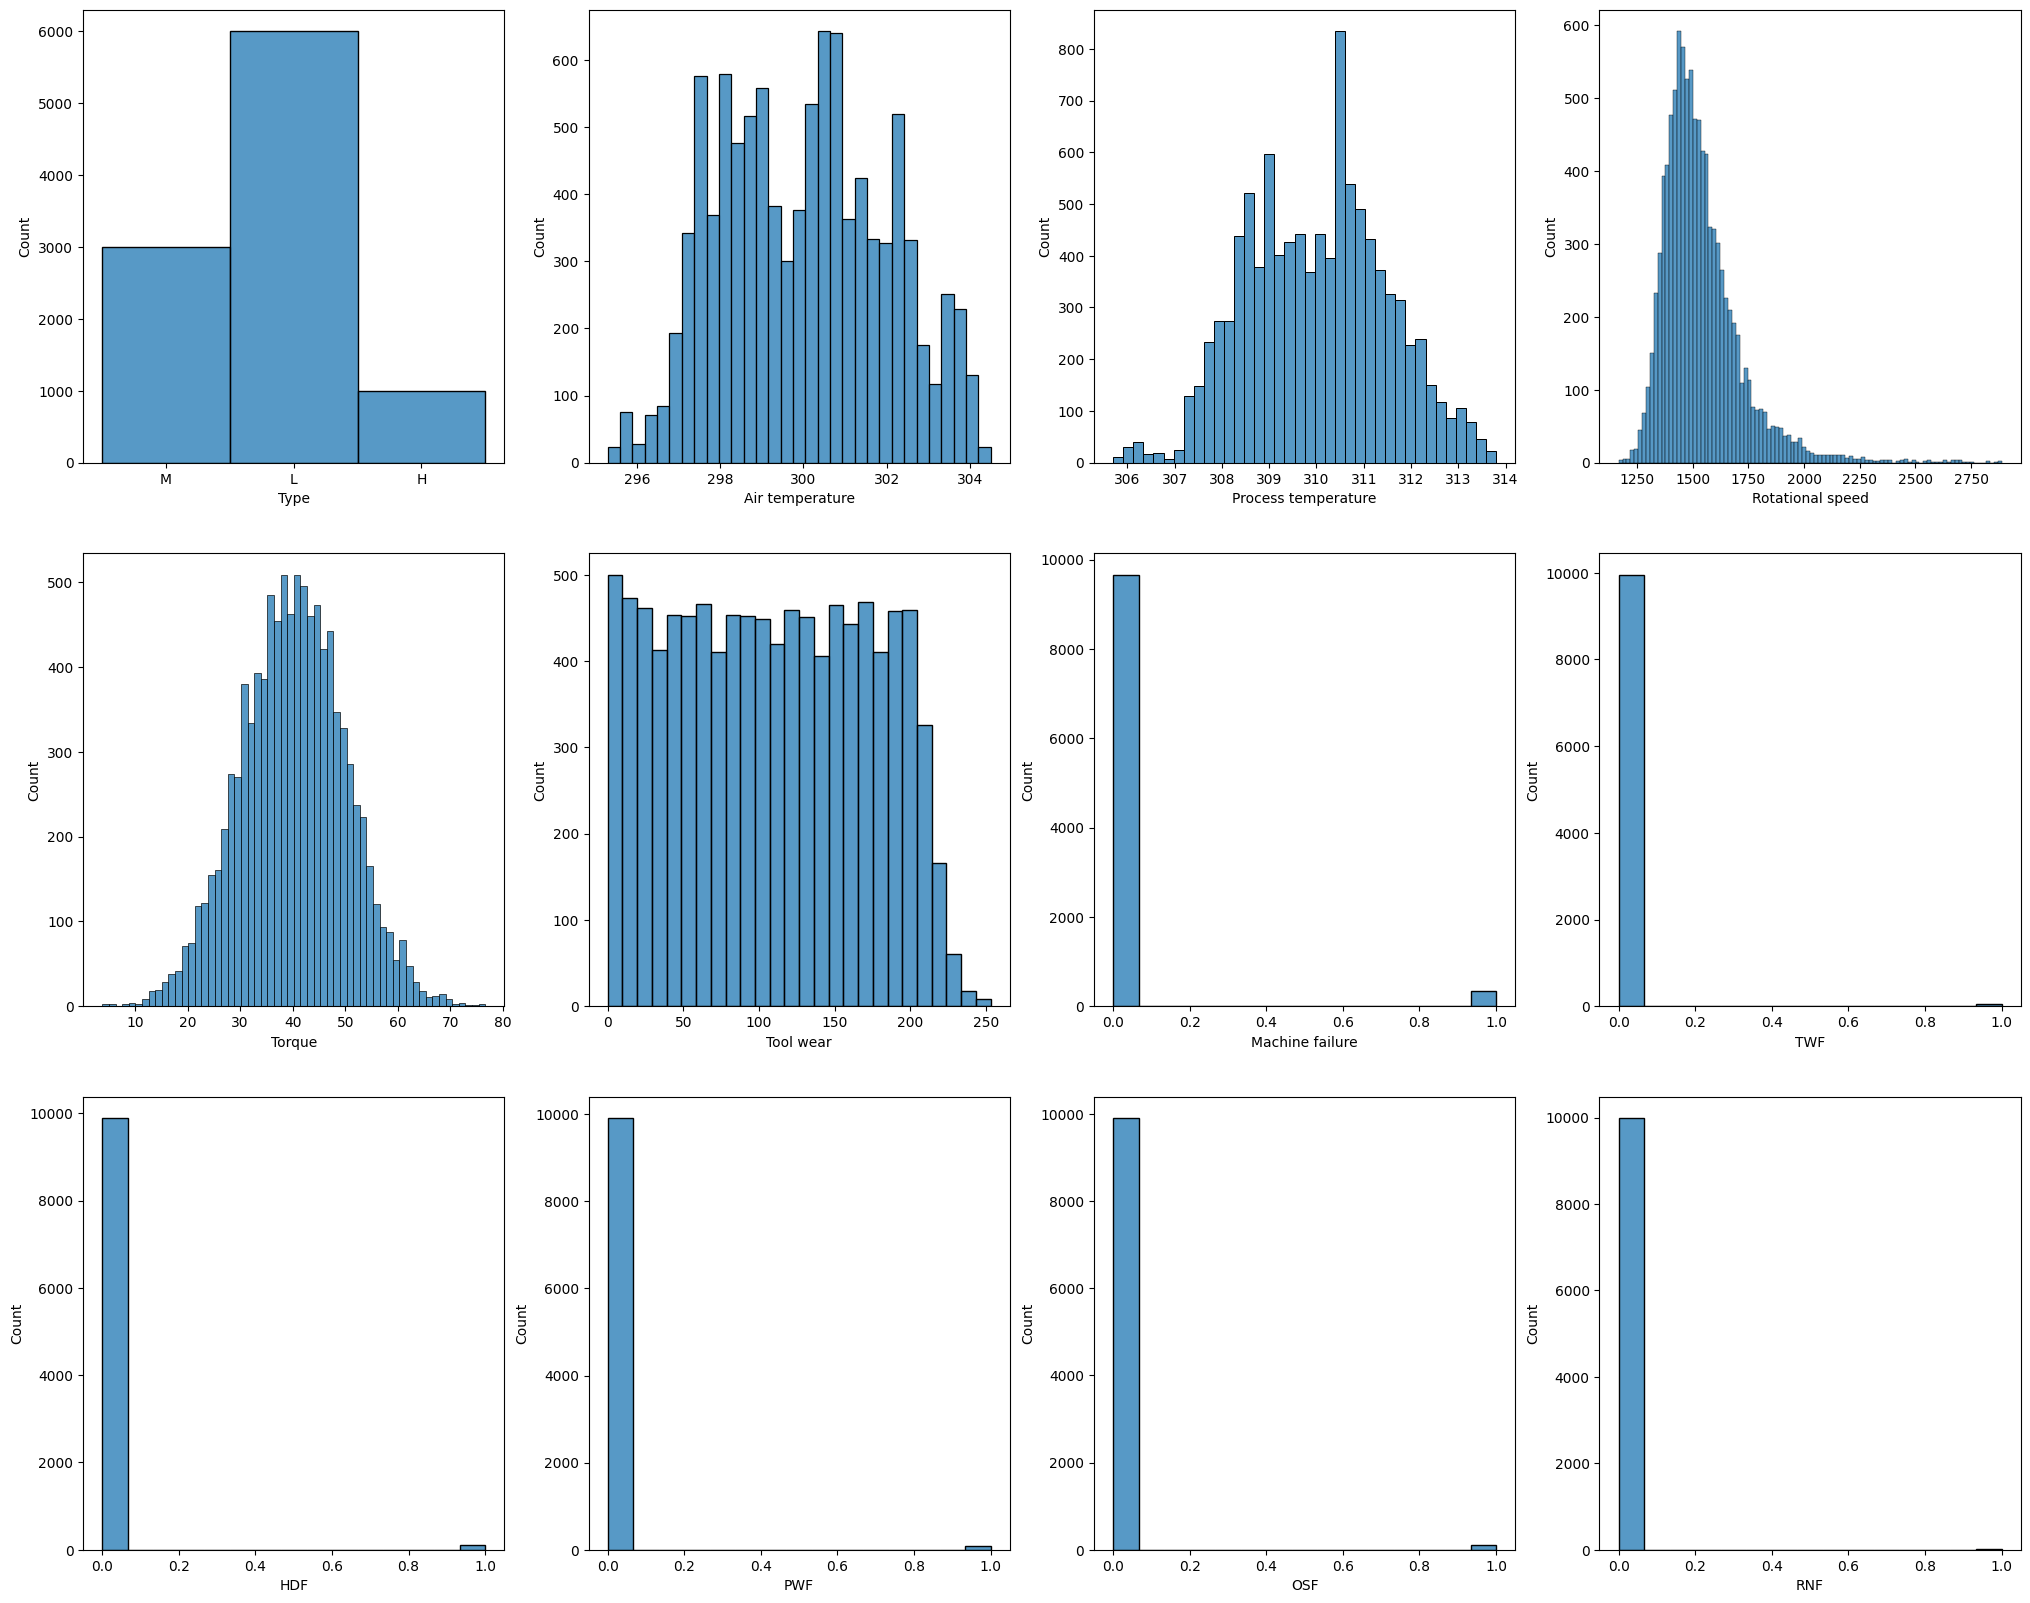

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

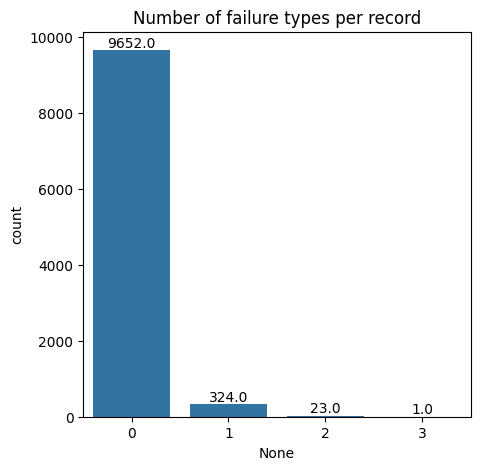

In [ ]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

As shown above, 24 records contain more than one type of failure, but their count is very small compared to the entire data set, so we will combine the failure types into one feature. The individual failure types are then dropped.

> No failure = 0, TWF = HDF = PWF = OSF = RNF = 1


In [ ]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

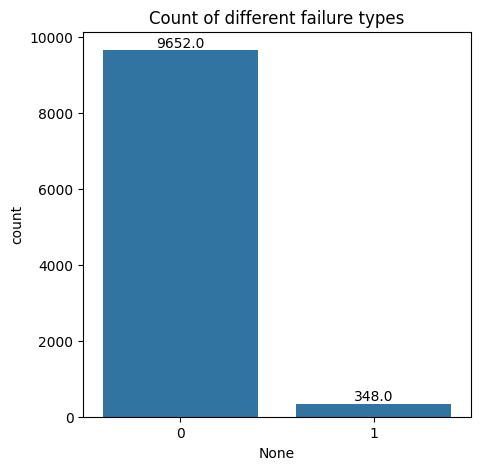

In [ ]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

We can derive a new attribute using this formula:

$Power = Torque \times Rotational \ speed$

In [ ]:
df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)

<Axes: xlabel='Power', ylabel='Count'>

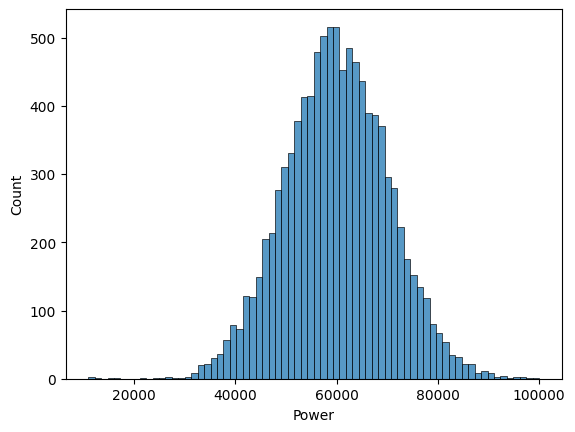

In [ ]:
# Plot the histogram of Power attribute
sns.histplot(df['Power'])

## **Data type conversion** ⛓️

In [ ]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

<ipython-input-25-78bd950d0638>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace('L', 0, inplace=True)
<ipython-input-25-78bd950d0638>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [ ]:
# view columns data types
df.dtypes

,0
Type,float64
Air temperature,float64
Process temperature,float64
Rotational speed,float64
Torque,float64
Tool wear,float64
Machine failure,float64
Power,float64


## **Handling outliers**❗

In [ ]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

Calculate and handle the outliers for each attribute using IQR and Winsorization

In [ ]:
for col in df.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] <= (Q1 - 1.5 * IQR)) | (df[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df.drop(outliers.index, inplace=True)

## **Transformation** ⛏️

Normalize the attributes using z-score

$z = \frac{x - \mu} {\sigma}$, $\mu:$ Mean, $σ:$ Standard deviation

In [ ]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

A scatter plot matrix to display the relationships between attributes in the dataset

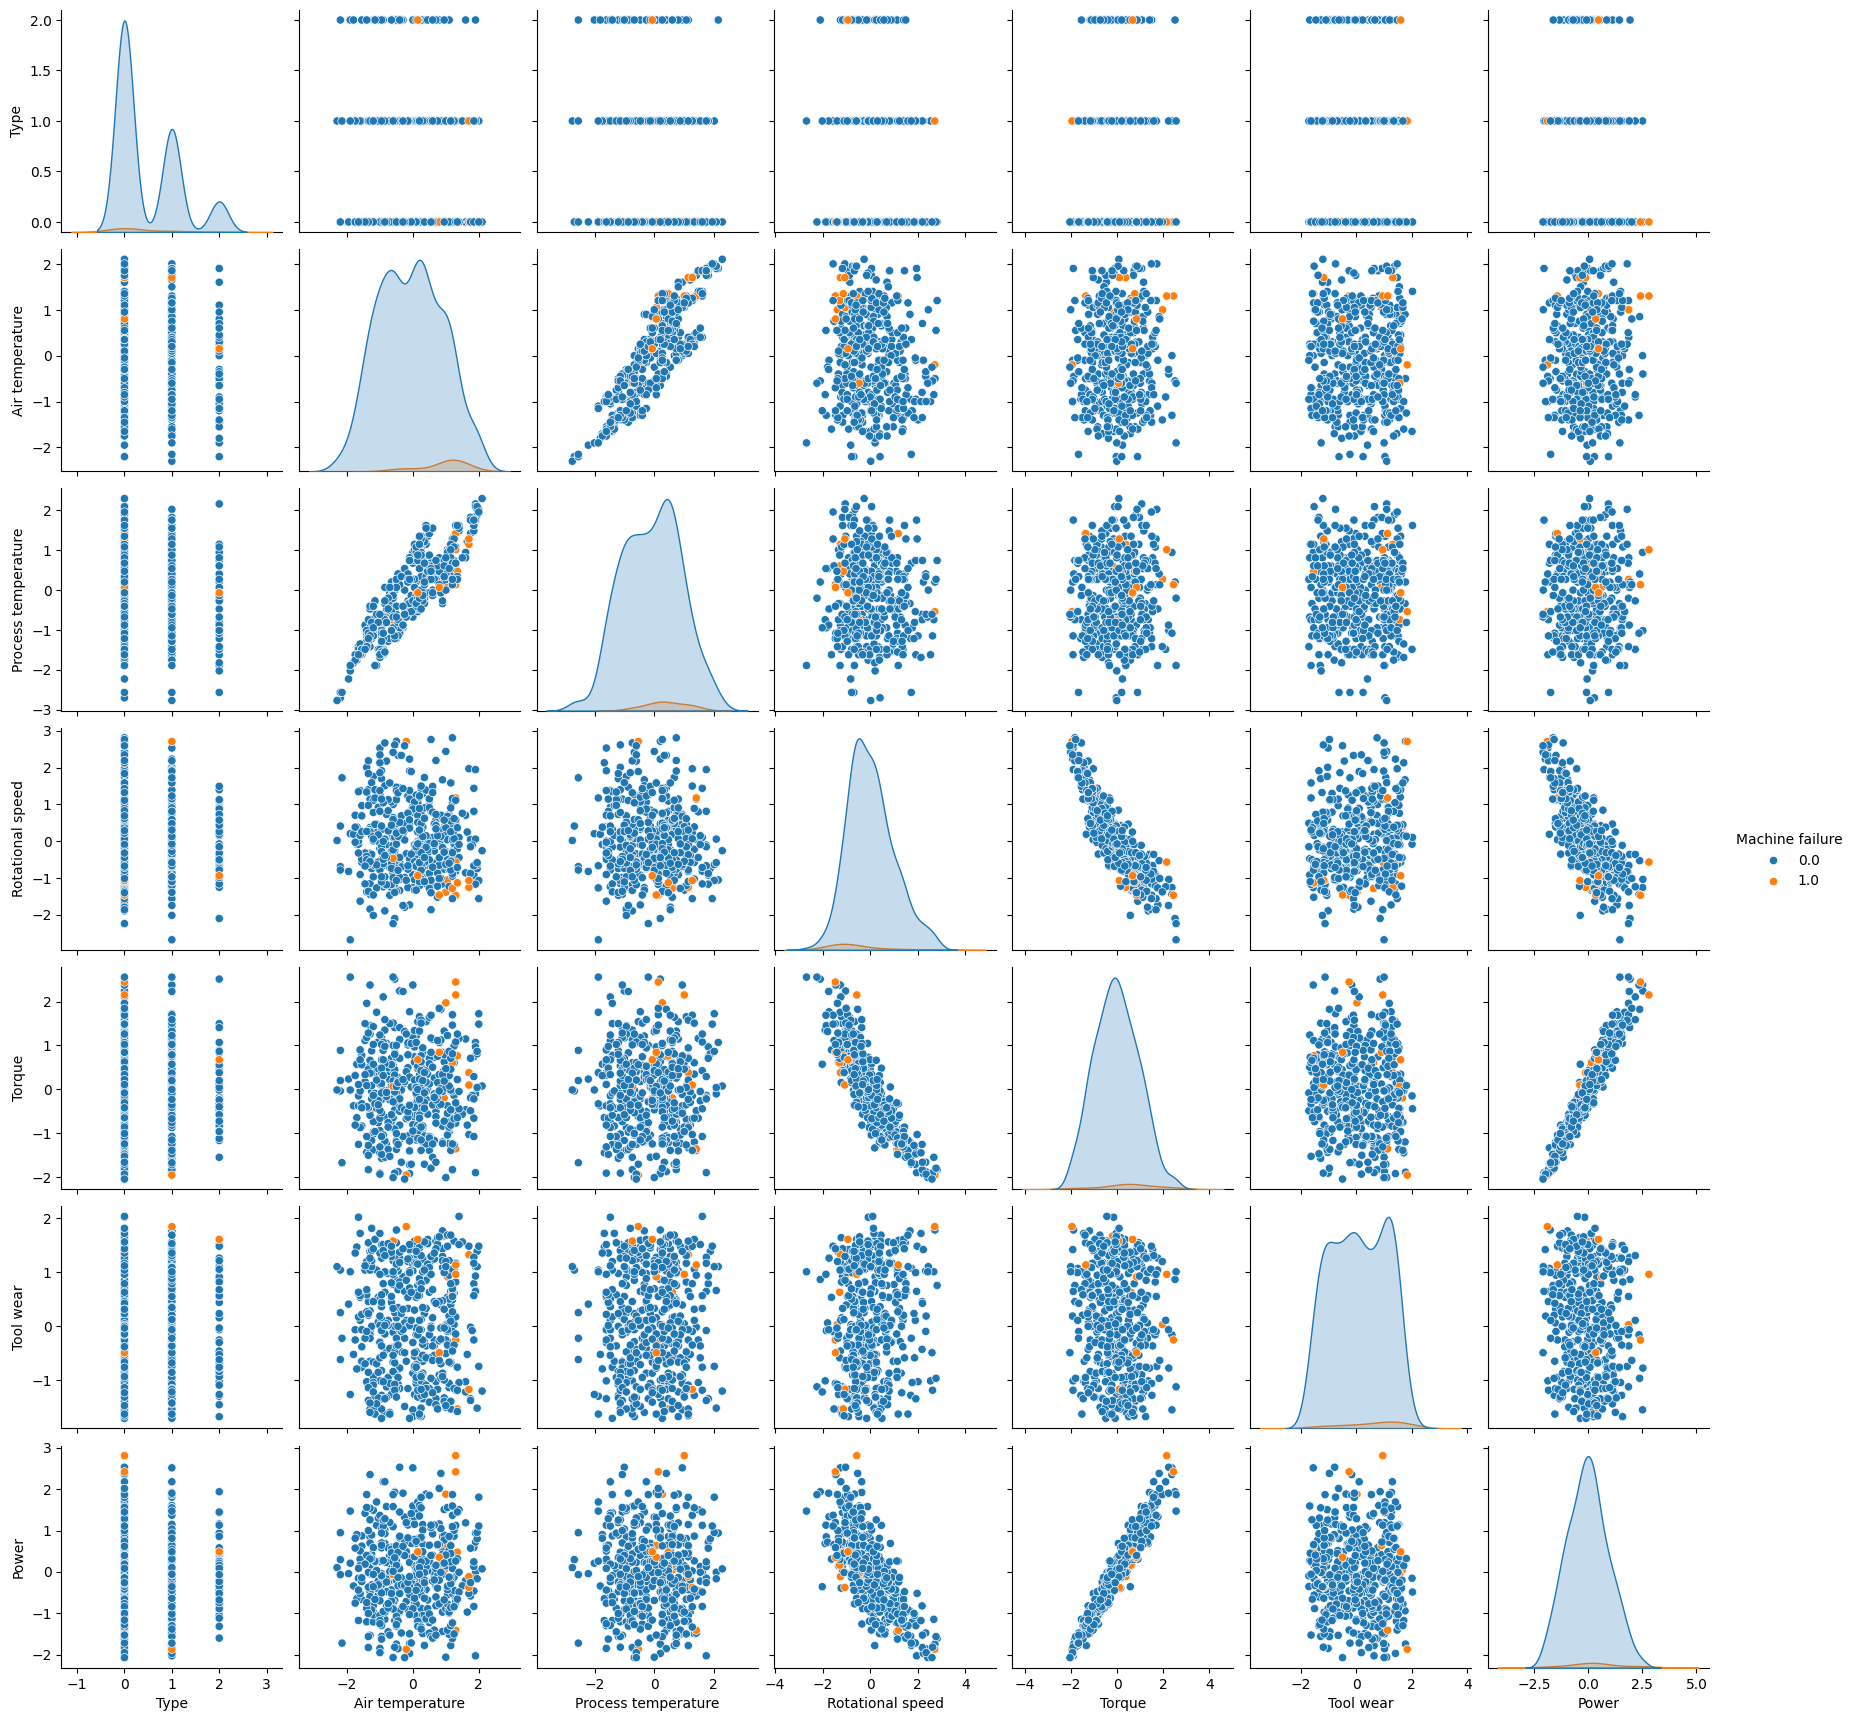

In [ ]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

## **Clustering**

In [ ]:
# features to use for clustering
X = df[["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"]]

# **Descriptive analytics**

* Partitional Clustering, **K-means algorithm**

Elbow method to determine the optimal number (k) of clusters

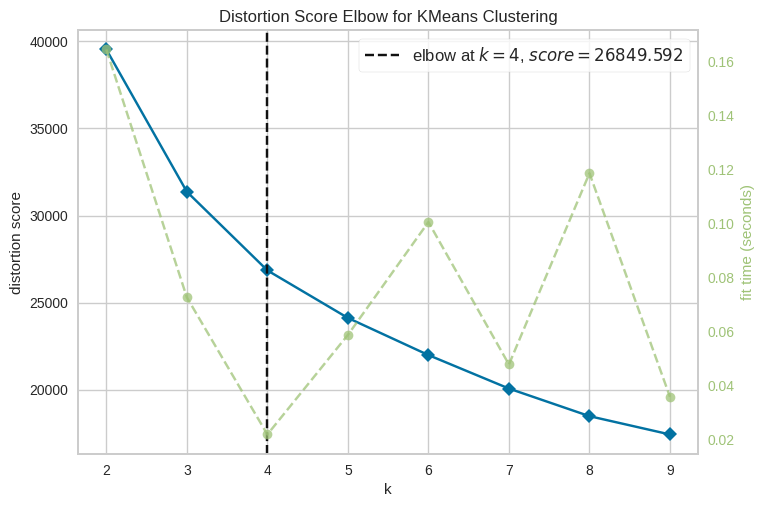

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# K-means clustering
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10)) # it turns out that k = 4 is the optimal number of clusters

visualizer.fit(X)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

df["kmeans_cluster"] = kmeans.predict(X)

Plot the results

<Figure size 1000x800 with 0 Axes>

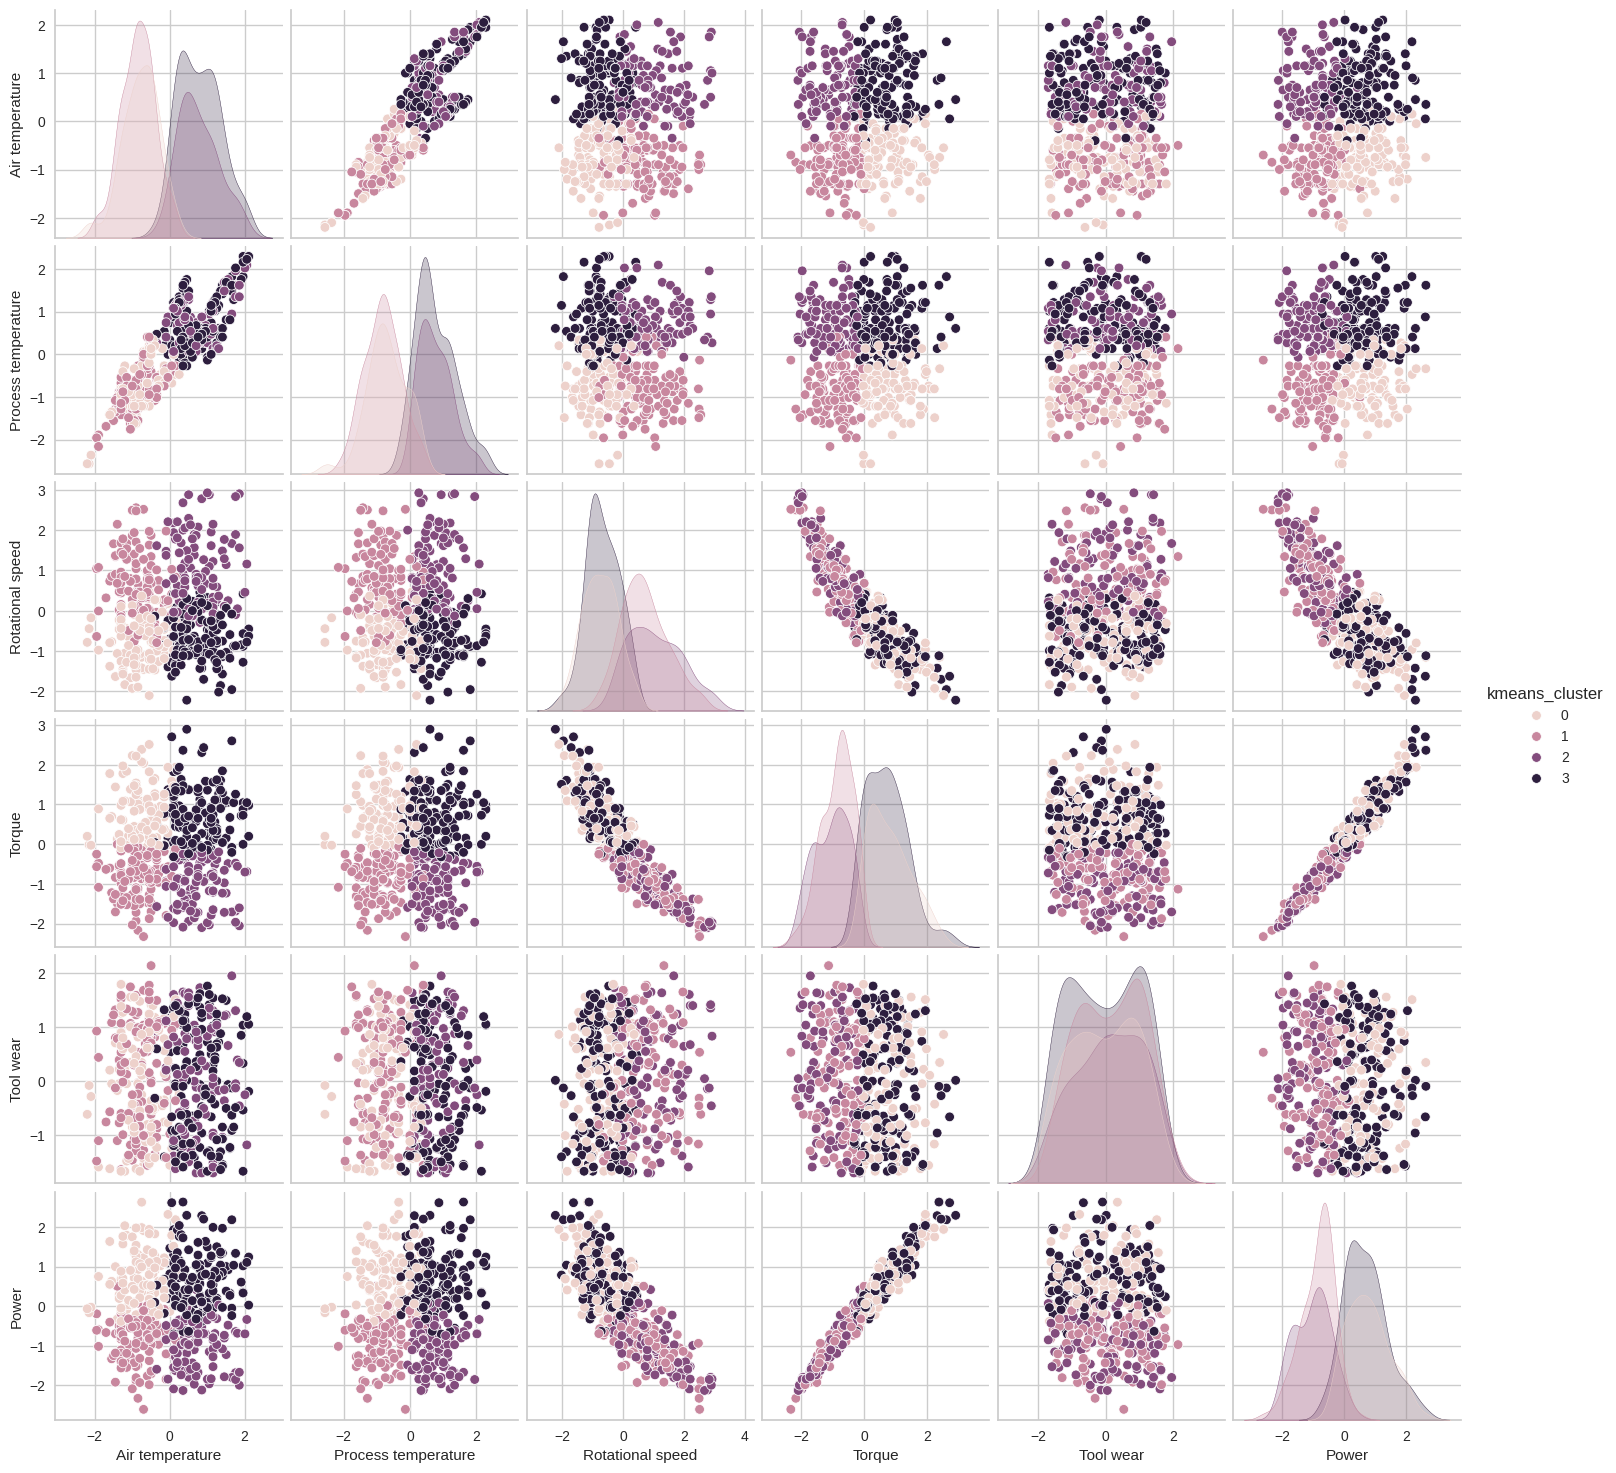

In [ ]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

# **Modeling** 🧪

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## **Data splitting and sampling**

In [ ]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power', 'kmeans_cluster'],
      dtype='object')

Because the data is imbalanced, we oversample the entire set

In [ ]:
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Prepare the features and target variable
X = df.drop(["Machine failure", "kmeans_cluster"], axis=1)
y = df["Machine failure"]

# Apply oversampling (SVMSMOTE) to balance the classes before the train-test split
svm_estimator = SVC(kernel='rbf', gamma='scale', class_weight='balanced')

oversample = SVMSMOTE(
    random_state=42,
    k_neighbors=5,
    m_neighbors=10,
    svm_estimator=svm_estimator
)

X_resampled, y_resampled = oversample.fit_resample(X, y)





Split the dataset (70% train : 30% test)

In [ ]:
# Split the resampled data into training and test set (with stratification)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y_resampled)

Training set after oversampling

(array([6484.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6484.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

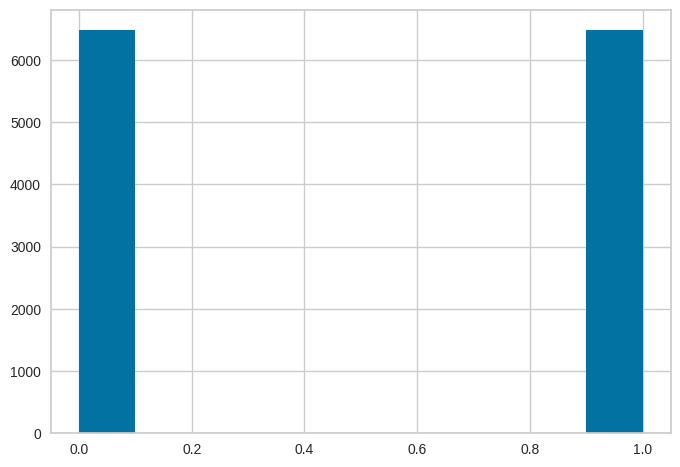

In [ ]:
plt.hist(y_train)

(array([2779.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2779.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

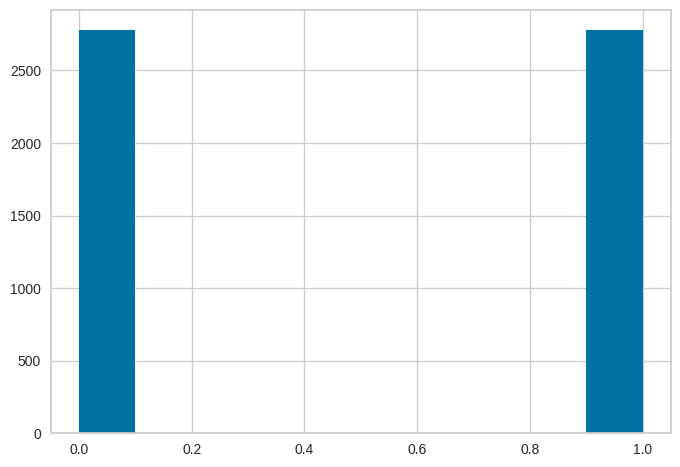

In [ ]:
plt.hist(y_test)

## **Decision Tree Model**

Build the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2779
         1.0       0.98      0.99      0.98      2779

    accuracy                           0.98      5558
   macro avg       0.98      0.98      0.98      5558
weighted avg       0.98      0.98      0.98      5558



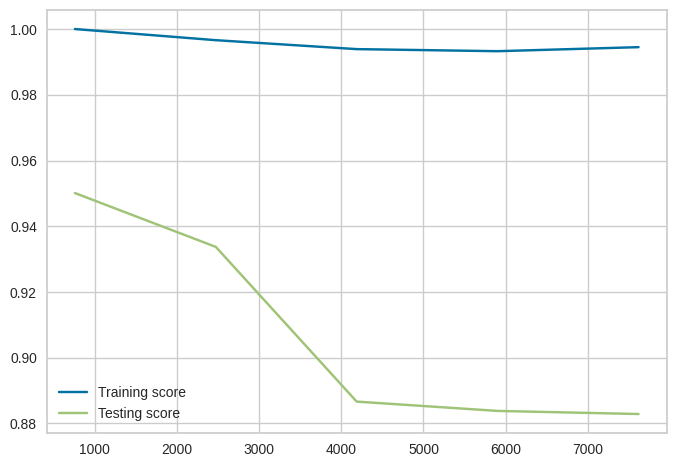

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Decision Tree model

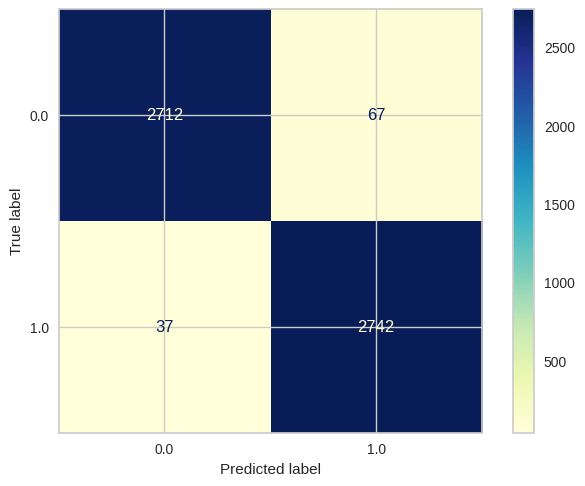

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **k-NN (K-nearest neighbors) Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


Build the model

In [ ]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2779
         1.0       0.98      0.99      0.99      2779

    accuracy                           0.99      5558
   macro avg       0.99      0.99      0.99      5558
weighted avg       0.99      0.99      0.99      5558



Confusion matrix of k-NN model

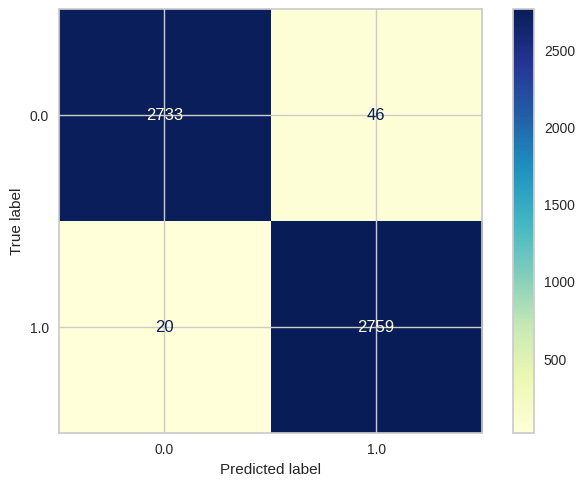

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **Random Forest Model**

Build the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

import pickle

# Save trained model to a .pkl file
with open('finalized_model.pkl', 'wb') as file:
    pickle.dump(model, file)


Model evaluation for each Machine failure class:

0. No failure
1. Machine failure


In [ ]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2779
         1.0       0.99      0.99      0.99      2779

    accuracy                           0.99      5558
   macro avg       0.99      0.99      0.99      5558
weighted avg       0.99      0.99      0.99      5558



Confusion matrix of Random Forest model

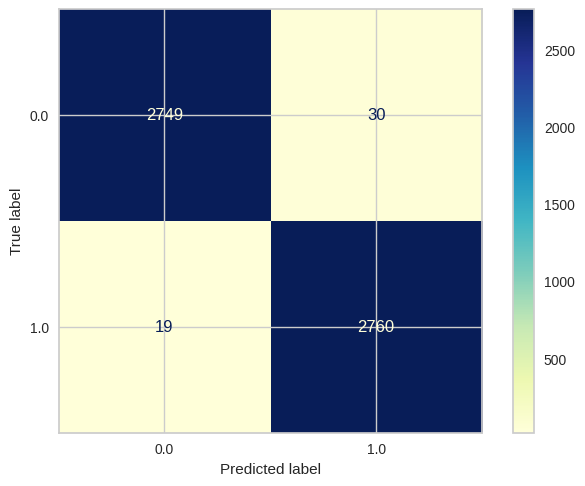

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

# **Evaluation** 🎲

In [ ]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.981288,0.981344,0.981288,0.981288,0.080008,0.002612
k-NN,0.988125,0.988168,0.988125,0.988125,0.017526,0.334776
Random Forest,0.991184,0.991192,0.991184,0.991184,2.558823,0.057822


In [1]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00


In [4]:
import pickle
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.preprocessing import StandardScaler

# Assume 'df' is already defined somewhere earlier in the notebook
dataset = df

# Load the trained model
loaded_model = pickle.load(open('/content/finalized_model.pkl', 'rb'))

# Rename dataset columns for consistency
dataset.rename(columns = {
    'Air temperature [K]': 'Air temperature',
    'Process temperature [K]': 'Process temperature',
    'Rotational speed [rpm]': 'Rotational speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool wear'
}, inplace = True)

# Create a new 'Power' feature
dataset['Power'] = dataset[['Rotational speed', 'Torque']].product(axis=1)

# Function to calculate z-score
def z_score(feature, value):
    mean = np.mean(dataset[feature])
    std = np.std(dataset[feature])
    return (float(value) - mean) / std

# Prediction function
def predict(air_temperature, process_temperature, rotational_speed, torque, tool_wear, type):
    # Normalize inputs using z-score
    air_temperature = z_score('Air temperature', air_temperature)
    process_temperature = z_score('Process temperature', process_temperature)
    rotational_speed = z_score('Rotational speed', rotational_speed)
    torque = z_score('Torque', torque)
    tool_wear = z_score('Tool wear', tool_wear)
    power = z_score('Power', torque * rotational_speed)

    # Map type
    mapping = {'L': 0, 'M': 1, 'H': 2}
    temp = [{
        'Type': mapping[type],
        'Air temperature': air_temperature,
        'Process temperature': process_temperature,
        'Rotational speed': rotational_speed,
        'Torque': torque,
        'Tool wear': tool_wear,
        'Power': power
    }]

    input_data = pd.DataFrame(temp)
    prediction = loaded_model.predict_proba(input_data)

    # Prepare prediction results
    classes = ["No failure", "Machine failure"]
    prediction_dict = {classes[i]: prediction[0][i] for i in range(2)}

    # Determine maintenance action
    maintenance = "No action required"
    if max(prediction_dict, key=prediction_dict.get) != "No failure":
        maintenance = "Need maintenance"

    return prediction_dict, maintenance

# Gradio Interface
demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Slider(100, 350, label="Air temperature"),
        gr.Slider(100, 350, label="Process temperature"),
        gr.Number(label="Rotational speed"),
        gr.Number(label="Torque"),
        gr.Number(label="Tool wear"),
        gr.Radio(["L", "M", "H"], label="Type")
    ],
    outputs=[
        gr.Label(num_top_classes=2, label="Result"),
        gr.Textbox(label="Action")
    ]
)

# Launch the app
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a642a292193bed212e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
